# Learning Analysis

The purpose of this notebook is to document results from training

## Preamble

In [194]:
import pandas as pd
import dill
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt
import dill
import torch
import numpy as np

### Helper Functions

In [195]:
def calc_win_percentage(winner_list, creatures):
    total_games_played = len(winner_list)
    counts = Counter(winner_list)
    win_percentages = {creature: num_wins/total_games_played for creature, num_wins in counts.items()}
    for creature in creatures:
        if creature not in win_percentages.keys():
            win_percentages[creature] = 0
    return win_percentages

def report_actions(state):
    action_names = [
        "end",
        "left",
        "right",
        "up",
        "down",
        "shot",
    ]

    dist, value = policy_net(state)
    action_probs = dist.probs.data.numpy()[0]

    actions = list(zip(action_names, action_probs))
    for an, a in actions:
        print("{}: \t{}".format(an, a))
    print("-----{}-----".format(
        action_names[int(np.argmax(action_probs))]
    ))


### Load Data

## Method Analysis

Number of games played: 898430


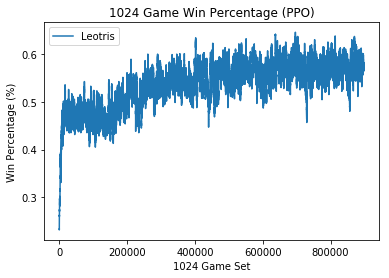

In [560]:
model_name = 'PPO'
winner_list = dill.load(open("results/winner_list_{}.pickle".format(model_name), "rb"))

batch_size = 1024
win_pcts = defaultdict(list)
avg_rewards = list()

creatures = ["Leotris"]

print("Number of games played: {}".format(len(winner_list)))

# Graph win percentage:
for i in range(0, len(winner_list) - batch_size):
    batch_winner_list = winner_list[i:(i+batch_size)]
    win_pct = calc_win_percentage(batch_winner_list, creatures=creatures)
    for creature, batch_win_pct in win_pct.items():
        win_pcts[creature].append(batch_win_pct)
for creature in creatures:
    plt.plot(range(len(win_pcts[creature])), win_pcts[creature], label=creature)
plt.title("{} Game Win Percentage ({})".format(batch_size, model_name))
plt.ylabel("Win Percentage (%)")
plt.xlabel("{} Game Set".format(batch_size))
plt.legend()
plt.savefig('results/{}.png'.format(model_name))
plt.show()


# reward_list = dill.load(open("results/reward_list_{}.pickle".format(model_name), "rb"))
# # Graph reward:
# for i in range(0, len(reward_list) - batch_size):
#     batch_reward_list = reward_list[i:(i+batch_size)]
#     avg_reward = np.mean(batch_reward_list)
#     avg_rewards.append(avg_reward)
    
# plt.plot(range(len(avg_rewards)), avg_rewards)
# plt.title("Average Rewards")
# plt.ylabel("Average Reward")
# plt.xlabel("{} Game Set".format(batch_size))
# plt.show()

## Scratch

In [562]:
policy_net = dill.load(open("results/model_{}.pickle".format(model_name), "rb"))
state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.2, # x pos
    0.2, # y pos
    0.1, # enemy x
    0.2, # enemy y
    0.0, # attacks used
    1.0, # movement remaining
    0.0, # number steps
]])

report_actions(state)
print()

state = torch.tensor([[
    1.0, # hit points
    1.0, # enemy hit points
    0.2, # x pos
    0.2, # y pos
    0.1, # enemy x
    0.2, # enemy y
    1.0, # attacks used
    1.0, # movement remaining
    0.0, # number steps
]])

report_actions(state)
print()

# for param in policy_net.actor_layer.parameters():
#     print(param)

end: 	6.679104968751459e-13
left: 	4.7357708865547465e-09
right: 	1.4274097459576751e-08
up: 	8.688910924092852e-09
down: 	1.8737482676556283e-08
shot: 	1.0
-----shot-----

end: 	0.9744243025779724
left: 	0.010744242928922176
right: 	0.0011136538814753294
up: 	0.0125125115737319
down: 	0.0011038078228011727
shot: 	0.0001014817098621279
-----end-----

